In [89]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [90]:
df_US = df[df['job_country'] == 'United States'].copy()

In [91]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')


In [92]:
df_US_pivot = df_US.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')
df_US_pivot.head()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114


In [93]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot['month_no']
df_US_pivot.columns


Index(['job_posted_month', 'Business Analyst', 'Cloud Engineer',
       'Data Analyst', 'Data Engineer', 'Data Scientist',
       'Machine Learning Engineer', 'Senior Data Analyst',
       'Senior Data Engineer', 'Senior Data Scientist', 'Software Engineer',
       'month_no'],
      dtype='object', name='job_title_short')

In [94]:
df_US_pivot.sort_values('month_no', inplace = True)
df_US_pivot.set_index('job_posted_month', inplace = True)
df_US_pivot.drop(columns='month_no',inplace=True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

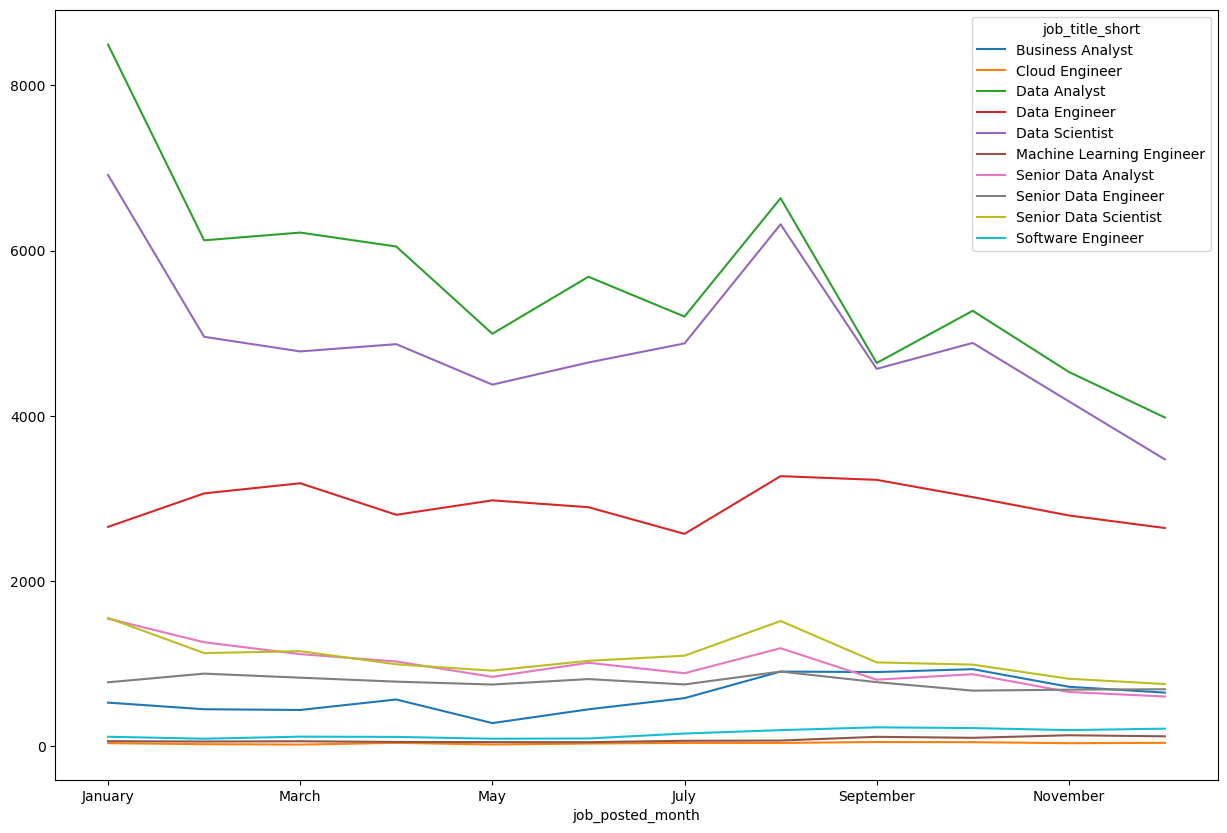

In [103]:
df_US_pivot.plot(kind='line', figsize=(15,10))

In [104]:
top_3 = df_US['job_title_short'].value_counts().head(3)

top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

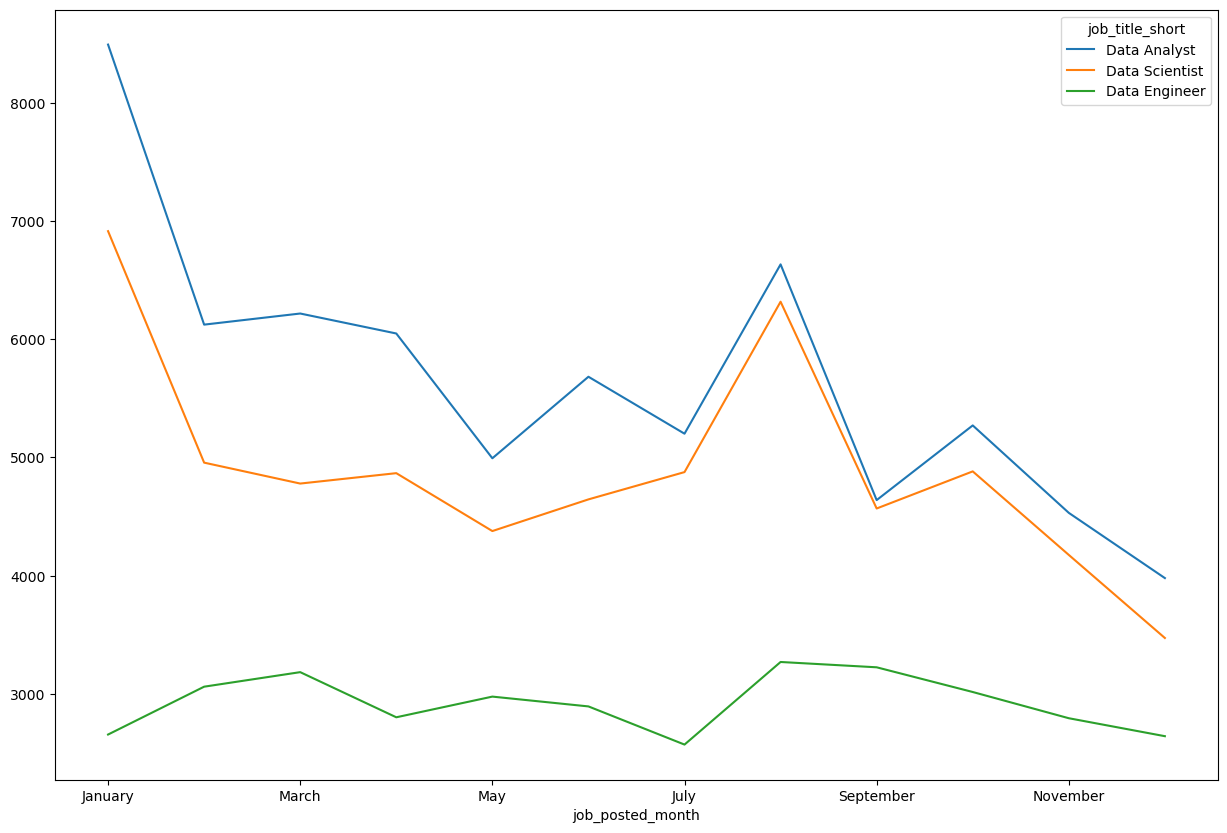

In [105]:
df_US_pivot[top_3].plot(kind='line', figsize=(15,10))